In [1]:
pip install quandl 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import quandl
quandl.ApiConfig.api_key = "nUqyP3u7T-rY9U8sL92P"
import numpy as np
import pandas as pd
# import regular libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime
import time
import pymongo
import requests
from pandas.io.json import json_normalize
from statistics import stdev 
import json
import math

# from SciPy packages
from statsmodels.tsa.stattools import adfuller # adfuller test
from statsmodels.graphics.tsaplots import plot_acf # autocorellation plot
from statsmodels.graphics.tsaplots import plot_pacf # partial autocorellation plot

# math function
from math import sqrt

# evaluation metrics
from sklearn.metrics import mean_squared_error

# statistics models
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# libraries to filter warnings in some algorithms
import warnings
warnings.filterwarnings("ignore")

%tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
# import regular libraries 
from datetime import datetime
import time
import pymongo
import requests
from pandas.io.json import json_normalize
from statistics import stdev 
import json

# from SciPy packages
from statsmodels.tsa.stattools import adfuller # adfuller test
from statsmodels.graphics.tsaplots import plot_acf # autocorellation plot
from statsmodels.graphics.tsaplots import plot_pacf # partial autocorellation plot

# math function
from math import sqrt

# evaluation metrics
from sklearn.metrics import mean_squared_error

# statistics models
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# libraries to filter warnings in some algorithms
import warnings
warnings.filterwarnings("ignore")

import pandas_datareader.data as web


UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
myclient = pymongo.MongoClient(host = '139.162.167.213:27017',username="mongo-naascap",password="n44$c4p")
cw = "?api_key=XRSFO6KHEQC87X8UOYZJ"

ts='6h'
market='coinbase-pro'
quote='btc'



def boxAsset(t,c):
    cbp=myclient["Spot"]
    bn=cbp.collection_names()
    l=[word.split("_")[2] for word in bn if(word.startswith(t+"_"+c))]
    l.sort()
    return l

def getAssetClose(t,c,a):
    cbp=myclient["Spot"]
    db=cbp[t+"_"+c+"_"+a]
    db=pd.DataFrame(list(db.find({},{"_id":1,"close":1}).sort("_id",-1)))
    db.rename(columns={'close':a},inplace=True)
    db.index=[(datetime.fromtimestamp(i)) for i in db._id]
    return db[a]


def getMarketCloses(ts):
    assets=boxAsset(ts,market)
    closes=[getAssetClose(ts,market,asset) for asset in assets]
    data = pd.concat(closes,join='outer',axis=1,sort=False)
    date_format = "%d/%m/%Y"
    date = datetime.strptime('01/01/2020', date_format)
    data=data[[date<=dates for dates in data.index]]
    return data


def getColumns(TT):
    df=pd.DataFrame([TT.columns,TT.columns]).T.set_axis(['id', 'name'], axis=1, inplace=False)
    L=[0]*(len(df))
    for i in (range(len(df))):
        L[i]={'id':df["id"][i],'name':df["name"][i]}
    return L
 
def listToDropDown(l):
    df=pd.DataFrame([l,l]).T.set_axis(['Value', 'Label'], axis=1, inplace=False)
    df=df.sort_values("Value").reset_index()
    L=[0]*len(df)
    for i in range(len(df)):
        L[i]={'label':df["Label"][i],'value':df["Value"][i]}
    return L




def TableBaseFromSymbol():
    URL="https://api.cryptowat.ch/pairs"
    res = requests.get(URL + cw)
    T=json_normalize(json.loads(res.content.decode('utf-8'))["result"])
    T=T.loc[:,["symbol","base.symbol","quote.symbol"]]
    return T
T = TableBaseFromSymbol()
def BaseFromSymbol(T,sym):
    if(sym in list(T.symbol)):
        return T["base.symbol"][T.symbol==sym].iloc[0]

def QuoteFromSymbol(T,sym):
    if(sym in list(T.symbol)):
        return T["quote.symbol"][T.symbol==sym].iloc[0]

def getAllAssetCloseByTime(t):
    cbp=myclient["Spot"]
    bn=cbp.collection_names()
    bn=[word for word in bn if(word.split("_")[1]== market and word.split("_")[0]==t)]
    df=pd.DataFrame()
    l2=[]
    l=list(set([word.split("_")[2] for word in bn]))
    TT=list(set([BaseFromSymbol(T,i) for i in l if(QuoteFromSymbol(T,i)) == quote]))
    for asset in TT:
        l1=[word for word in bn if(BaseFromSymbol(T,word.split("_")[2])==asset and QuoteFromSymbol(T,word.split("_")[2]) == quote)]
        rr=[pd.DataFrame(list(cbp[i].find({},{ "_id": 1, "close": 1})),index=pd.DataFrame(list(cbp[i].find({},{ "_id": 1})))._id) for i in l1]
        data = pd.concat([i["close"] for i in rr],join='outer',axis=1,sort=False)
        l2.append(data.mean(axis=1))

    df=pd.concat(l2,axis=1)
    df.columns=(TT)
    df.index=[(datetime.fromtimestamp(i)) for i in df.index]
    df = df.fillna(method = "ffill")
    
    return df

def getAllAssetVolumeByTime(t):
    cbp=myclient["Spot"]
    bn=cbp.collection_names()
    bn=[word for word in bn if(word.split("_")[1]== market and word.split("_")[0]==t)]
    df=pd.DataFrame()
    l2=[]
    l=list(set([word.split("_")[2] for word in bn]))
    TT=list(set([BaseFromSymbol(T,i) for i in l if(QuoteFromSymbol(T,i)) == quote]))
    for asset in TT:
        l1=[word for word in bn if(BaseFromSymbol(T,word.split("_")[2])==asset and QuoteFromSymbol(T,word.split("_")[2]) == quote)]
        rr=[pd.DataFrame(list(cbp[i].find({},{ "_id": 1, "volume_quote": 1})),index=pd.DataFrame(list(cbp[i].find({},{ "_id": 1})))._id) for i in l1]
        data = pd.concat([i["volume_quote"] for i in rr],join='outer',axis=1,sort=False)
        l2.append(data.mean(axis=1))

    df=pd.concat(l2,axis=1)
    df.columns=(TT)
    df.index=[(datetime.fromtimestamp(i)) for i in df.index]
    df = df.fillna(0)
    
    return df


In [5]:
market='coinbase-pro' #'kraken'
quote='usd' #'btc'
ts='1d' # '5m' '2h' '6h' '12h' '1d'
prices=getAllAssetCloseByTime(ts)
df1=getAllAssetVolumeByTime('1d') 

In [6]:
prices= prices.fillna(prices.mean())
df1=df1.fillna(df1.mean())

In [7]:
data=prices


In [8]:
def get_Close_data(df1,ch):
    df=df1[[ch]]
    x=len(df)%7 
    df=df.drop(df.index[0:x])
    return df

In [9]:
df= get_Close_data(prices,'btc')

In [10]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.index, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [11]:
df.head()

,btc
2015-01-29,236.089996
2015-01-30,235.029999
2015-01-31,229.070007
2015-02-01,218.449997
2015-02-02,228.990005


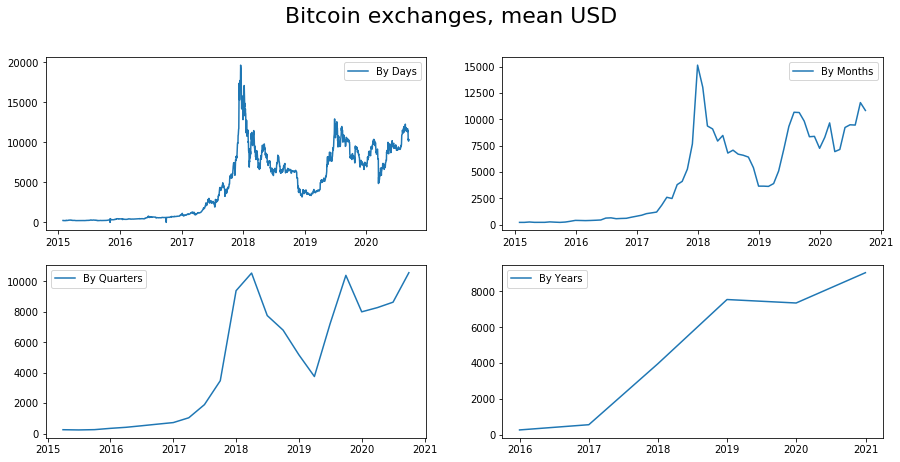

In [12]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.btc, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.btc, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.btc, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.btc, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()


In [16]:
data

,nmr,etc,dai,xrp,bch,comp,link,eth,eos,omg,...,ltc,algo,xtz,atom,xlm,knc,dash,mkr,oxt,zrx
2015-01-27 01:00:00,45.062795,6.685603,1.010408,0.267916,514.481348,179.503462,4.110315,244.102313,3.65715,2.219902,...,64.568152,0.288303,2.019177,3.631205,0.078584,1.011281,76.236003,554.653932,0.218465,0.312238
2015-01-28 01:00:00,45.062795,6.685603,1.010408,0.267916,514.481348,179.503462,4.110315,244.102313,3.65715,2.219902,...,64.568152,0.288303,2.019177,3.631205,0.078584,1.011281,76.236003,554.653932,0.218465,0.312238
2015-01-29 01:00:00,45.062795,6.685603,1.010408,0.267916,514.481348,179.503462,4.110315,244.102313,3.65715,2.219902,...,64.568152,0.288303,2.019177,3.631205,0.078584,1.011281,76.236003,554.653932,0.218465,0.312238
2015-01-30 01:00:00,45.062795,6.685603,1.010408,0.267916,514.481348,179.503462,4.110315,244.102313,3.65715,2.219902,...,64.568152,0.288303,2.019177,3.631205,0.078584,1.011281,76.236003,554.653932,0.218465,0.312238
2015-01-31 01:00:00,45.062795,6.685603,1.010408,0.267916,514.481348,179.503462,4.110315,244.102313,3.65715,2.219902,...,64.568152,0.288303,2.019177,3.631205,0.078584,1.011281,76.236003,554.653932,0.218465,0.312238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-05 01:00:00,41.205900,6.053000,1.012866,0.250500,229.960000,193.200000,12.082120,388.720000,2.70200,3.540200,...,49.530000,0.365800,2.644500,5.065000,0.077685,1.328900,69.818000,571.157600,0.334700,0.461000
2020-09-06 01:00:00,42.851800,5.911000,1.020554,0.253200,230.580000,192.350000,12.565680,387.140000,3.12400,4.426700,...,50.070000,0.385900,2.795700,5.553000,0.082213,1.345100,72.862000,597.801600,0.378200,0.503029
2020-09-07 01:00:00,37.659400,5.727000,1.015076,0.234900,225.560000,157.500000,10.389410,328.270000,2.87700,3.742900,...,47.350000,0.342500,2.418700,4.913000,0.073542,1.178500,67.502000,513.049900,0.328900,0.425781
2020-09-08 01:00:00,38.291500,5.740000,1.019672,0.238800,228.610000,171.400000,12.593190,349.130000,2.88700,3.824100,...,47.830000,0.372800,2.512000,5.086000,0.077316,1.294900,69.607000,529.599700,0.337300,0.479448


## Modern Portfolio ##

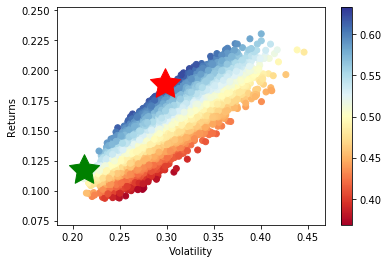

In [14]:



#list of stocks in portfolio
stocks = ['nmr', 'zrx', 'link', 'bch', 'etc', 'btc', 'dai', 'dash', 'xrp', 'band',
       'comp', 'rep', 'knc', 'omg', 'algo', 'mkr', 'atom', 'xlm', 'oxt', 'ltc',
       'xtz', 'eth', 'eos']

#download daily price data for each of the stocks in the portfolio
#data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()
returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns= returns.fillna(returns.mean())

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(23))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],
                                                stocks[8],stocks[9],stocks[10],stocks[11],stocks[12],stocks[13],stocks[14],stocks[15],stocks[16],stocks[17],stocks[18],stocks[19],stocks[20],stocks[21],
                                                stocks[22]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [15]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [15]:
p0=go.Scatter(x=results_frame.stdev,y=results_frame.ret)
#p1=go.Scatter(x=max_sharpe_port[1],y=max_sharpe_port[0])
#p2=go.Scatter(x=min_vol_port[1],y=min_vol_port[0])


In [16]:
dt=[p0]

In [17]:
layout = go.Layout(title = "Modern Portfolio")

In [18]:
fig = go.Figure(data=dt , layout=layout)


In [19]:
pyo.plot(fig,filename="page2.html")

'page2.html'

In [20]:
#pip install dash

In [21]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [22]:
#pip install dash

In [23]:
app = dash.Dash()

In [24]:
app.layout = html.Div(children = [html.H1("Modern Portfolio"),
                                  dcc.Graph(figure = fig )])

In [25]:
app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Sep/2020 20:30:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2020 20:30:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2020 20:30:35] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2020 20:30:35] "GET /_favicon.ico?v=1.15.0 HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2020 20:30:35] "GET /_dash-layout HTTP/1.1" 200 -
